## Imports

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
connect = sqlite3.connect('../data/checking-logs.sqlite.sqlite')

## analyze only the users and not the admins

In [3]:
request = '''
SELECT uid, timestamp
FROM checker
WHERE uid LIKE 'user_%'
'''
df = pd.io.sql.read_sql(request, connect, parse_dates=['timestamp'])
df

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370
...,...,...
3202,user_1,2020-05-21 20:19:06.872761
3203,user_1,2020-05-21 20:22:41.785725
3204,user_1,2020-05-21 20:22:41.877806
3205,user_1,2020-05-21 20:37:00.129678


In [4]:
df['weekday'] = df['timestamp'].apply(lambda x: x.strftime('%a'))
df['hour'] = df['timestamp'].dt.hour
df = df.drop('timestamp', axis=1)
df

,uid,weekday,hour
0,user_4,Fri,5
1,user_4,Fri,5
2,user_4,Fri,5
3,user_4,Fri,5
4,user_4,Fri,5
...,...,...,...
3202,user_1,Thu,20
3203,user_1,Thu,20
3204,user_1,Thu,20
3205,user_1,Thu,20


In [5]:
columns = df.groupby('uid').count().sort_values('hour', ascending=False).index

In [6]:
pivot_table = df.groupby('uid')['weekday'].value_counts().unstack(0)
pivot_table = pivot_table.reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
pivot_table = pivot_table.reindex(columns=columns)
pivot_table = pivot_table.fillna(0)
pivot_table

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_7,user_22,user_11,user_23,user_0
weekday,,,,,,,,,,,,,,,,,,,,,
Mon,35.0,50.0,24.0,14.0,7.0,0.0,23.0,5.0,0.0,46.0,...,8.0,10.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,3.0
Tue,86.0,87.0,131.0,44.0,9.0,1.0,0.0,0.0,16.0,11.0,...,4.0,5.0,0.0,0.0,0.0,5.0,3.0,0.0,0.0,0.0
Wed,33.0,0.0,32.0,15.0,0.0,34.0,8.0,0.0,37.0,0.0,...,1.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,0.0
Thu,108.0,17.0,4.0,40.0,78.0,51.0,96.0,7.0,77.0,7.0,...,17.0,14.0,15.0,5.0,2.0,0.0,2.0,0.0,6.0,0.0
Fri,61.0,0.0,0.0,10.0,10.0,2.0,7.0,35.0,1.0,59.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sat,0.0,79.0,31.0,66.0,21.0,16.0,3.0,90.0,4.0,3.0,...,32.0,0.0,0.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0
Sun,45.0,26.0,13.0,44.0,51.0,69.0,28.0,7.0,2.0,8.0,...,0.0,31.0,27.0,20.0,9.0,0.0,1.0,8.0,0.0,0.0


In [7]:
pivot_table2 = df.groupby('uid').hour.value_counts().unstack(0)
pivot_table2 = pivot_table2.reindex(index=range(24), fill_value=0)
pivot_table2 = pivot_table2.reindex(columns=columns)
pivot_table2 = pivot_table2.rename_axis('hour')
pivot_table2 = pivot_table2.fillna(0)
pivot_table2

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_7,user_22,user_11,user_23,user_0
hour,,,,,,,,,,,,,,,,,,,,,
0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
1,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,13.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,3.0,6.0,0.0,0.0,10.0,2.0,0.0,3.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,6.0,0.0,0.0,0.0,5.0,2.0,0.0,9.0,6.0,...,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## you can choose the color palette that you like for both of the graphs that you will need to draw in this exercise

## use the table checker for your query

## use absolute values of the commits, not the averages

## sort the dataframes by the total number of commits made by a user

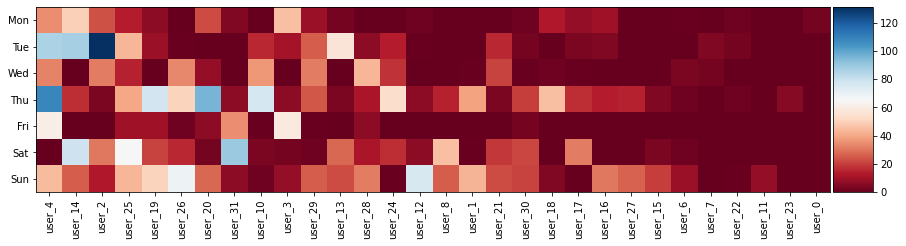

In [8]:
fig, ax = plt.subplots(figsize=(15, 8))
im = ax.imshow(pivot_table, cmap='RdBu')
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(im, cax=cax)
ax.set_xticks(range(pivot_table.shape[1]))
ax.set_yticks(range(pivot_table.shape[0]))
ax.set_xticklabels(pivot_table.columns)
ax.set_yticklabels(pivot_table.index)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

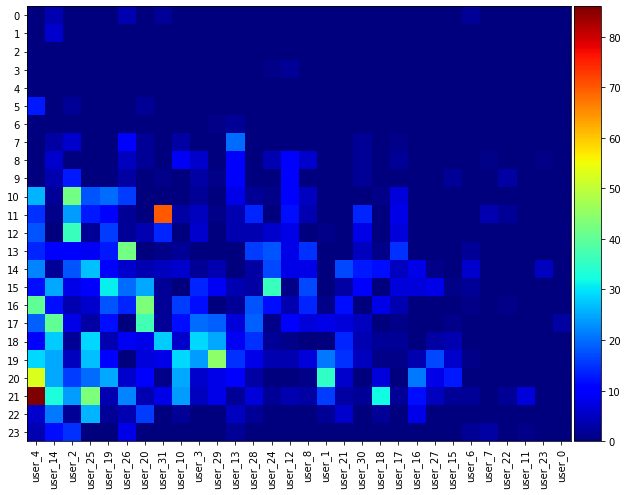

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))
im = ax.imshow(pivot_table2, cmap='jet')
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(im, cax=cax)
ax.set_xticks(range(pivot_table2.shape[1]))
ax.set_yticks(range(pivot_table2.shape[0]))
ax.set_xticklabels(pivot_table2.columns)
ax.set_yticklabels(pivot_table2.index)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

## Which user has the most commits on Tue?

user_2

## Which user has the most commits on Thu?

user_4

## On which weekday do the users not like making a lot of commits?

Fri

## Which user at which hour made the largest number of commits?

user_4 at 21

In [10]:
connect.close()